In [1]:
# Auto reload imported module everytime a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [2]:
# Import usual modules
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()
#here we assign 

In [4]:
# What datasets do we have access to now ? 
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'order_payments', 'order_reviews', 'products'])

In [5]:
orders = data['orders']

In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

In [10]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format='%Y-%m-%d')

In [12]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format='%Y-%m-%d')

In [15]:
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], format='%Y-%m-%d')
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format='%Y-%m-%d')

## Expected WAIT TIME 

In [20]:
expected_wait_time = orders['order_delivered_customer_date'] -orders['order_purchase_timestamp']

In [21]:
expected_wait_time 

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Length: 99441, dtype: timedelta64[ns]

## COMPUTE WAIT TIME 

In [33]:
waiting_time = (orders['order_delivered_customer_date'] -orders['order_purchase_timestamp'])/datetime.timedelta(days=1)

In [25]:
import datetime 

In [28]:
one_day_delta = datetime.timedelta(days=1)
waiting_time = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

In [29]:
waiting_time

0         8.436574
1        13.782037
2         9.394213
3        13.208750
4         2.873877
           ...    
99436     8.218009
99437    22.193727
99438    24.859421
99439    17.086424
99440     7.674306
Length: 99441, dtype: float64

In [34]:
wait_time_days = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / datetime.timedelta(days=1)

In [35]:
wait_time_days

0         8.436574
1        13.782037
2         9.394213
3        13.208750
4         2.873877
           ...    
99436     8.218009
99437    22.193727
99438    24.859421
99439    17.086424
99440     7.674306
Length: 99441, dtype: float64

## COMPUTE EXPECTED WAIT TIME 

In [43]:
expected_wait_time = (orders['order_estimated_delivery_date']- orders['order_purchase_timestamp']) / datetime.timedelta(days=1)

In [45]:
data['orders'].columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

## COMPUTE DELAY VS EXPECTED

In [49]:
delay_vs_expected = (orders['order_estimated_delivery_date']- orders['order_delivered_customer_date']) / datetime.timedelta(days=1)
delay_vs_expected.head(3)

0     7.107488
1     5.355729
2    17.245498
dtype: float64

## NEW COLOMN POUR TEST

In [57]:
orders.loc[:,'time_carrier'] = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']) / datetime.timedelta(days=1)

In [56]:
time_carrier = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']) / datetime.timedelta(days=1)

In [58]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait_time,delay_vs_expected,expected_wait_time,time_carrier
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,15.544063,6.062650
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,19.137766,12.039410
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,26.639711,9.178113
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,26.188819,9.450498
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,12.112049,1.937824
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,-10.369433,18.587442,7.159699
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,-1.265324,23.459051,20.760579
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,-5.524803,30.384225,23.605451
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,-20.018819,37.105243,13.331840


# Checking the new dataframe 

In [ ]:
orders[['order_id', 'wait_time_days', 'expected_wait_time', 'delay_vs_expected']]

In [53]:
orders.loc[:,'wait_time']

0         8.436574
1        13.782037
2         9.394213
3        13.208750
4         2.873877
           ...    
99436     8.218009
99437    22.193727
99438    24.859421
99439    17.086424
99440     7.674306
Name: wait_time, Length: 99441, dtype: float64

In [51]:
import datetime
one_day_delta = datetime.timedelta(days=1) # a "timedelta" object of 1 day
one_day_delta = np.timedelta64(24, 'h') # a "timedelta64" object of 1 day (use the one you prefer)

# Assign compute delay vs expected
orders.loc[:,'wait_time'] = \
    (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / one_day_delta

orders.loc[:,'delay_vs_expected'] = \
    (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']) / one_day_delta

orders.loc[:,'expected_wait_time'] = \
    (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']) / one_day_delta
(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
         ... 
99436     8.0
99437    22.0
99438    24.0
99439    17.0
99440     7.0
Length: 99441, dtype: float64

In [59]:
orders 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait_time,delay_vs_expected,expected_wait_time,time_carrier
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.436574,-7.107488,15.544063,6.062650
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.782037,-5.355729,19.137766,12.039410
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.394213,-17.245498,26.639711,9.178113
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.208750,-12.980069,26.188819,9.450498
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.873877,-9.238171,12.112049,1.937824
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.218009,-10.369433,18.587442,7.159699
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.193727,-1.265324,23.459051,20.760579
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.859421,-5.524803,30.384225,23.605451
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.086424,-20.018819,37.105243,13.331840


In [ ]:
# vérifier les colonnes que l'on viens de crée 

In [60]:
orders[['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected']]

,order_id,wait_time,expected_wait_time,delay_vs_expected
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,-7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,-5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,-17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,-12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,-9.238171
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,-10.369433
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,-1.265324
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,-5.524803
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,-20.018819


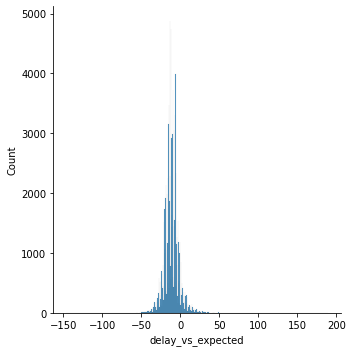

In [61]:
sns.displot(orders['delay_vs_expected'])

In [63]:
data

{'sellers':                              seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paul

In [62]:
reviews = data["order_reviews"]
reviews
#assigner reviews à order_reviews 

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
#dim_is_five_star 
#dim_is_one_star 

In [65]:
def dim_is_five_star(x):
    if x == 5:
        return 1
    else :
        return 0

In [66]:
def dim_five_star(d):
    # $CHALLENGIFY_BEGIN
    if d == 5:
        return 1
    else:
        return 0
    # $CHALLENGIFY_END


def dim_one_star(d):
    # $CHALLENGIFY_BEGIN
    if d == 1:
        return 1
    else:
        return 0

In [68]:
reviews["dim_is_five_star"] = reviews["review_score"].map(dim_five_star) 
reviews["dim_is_one_star"] = reviews["review_score"].map(dim_one_star) 

## New Dataframe with reviews only :)

In [74]:
new_reviews = reviews[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]] 
new_reviews 

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


## DataFrame with: order_id, number_of_products (total number of products per order)

In [76]:
data

{'sellers':                              seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paul